In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,InputLayer,Flatten,Conv2D,MaxPooling2D,AveragePooling2D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

2024-06-12 13:45:57.459055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 13:45:57.459147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 13:45:57.589956: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading Data

In [ ]:
df = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
x = df.drop('label',axis=1)
y = df['label']

In [ ]:
print(x.shape)

(60000, 784)


In [ ]:
# plt.figure(figsize=(10,5))
plt.bar(x= y.unique(),height = y.value_counts())
plt.xticks(y.unique())
plt.title('Frequency of each class')
plt.show()

## Preprocessing

In [ ]:
# preprocessing the images
x = np.array(x)
x = x.reshape(60000,28,28,1)
x = x/255.0

x.shape

(60000, 28, 28, 1)

## Visualizing images

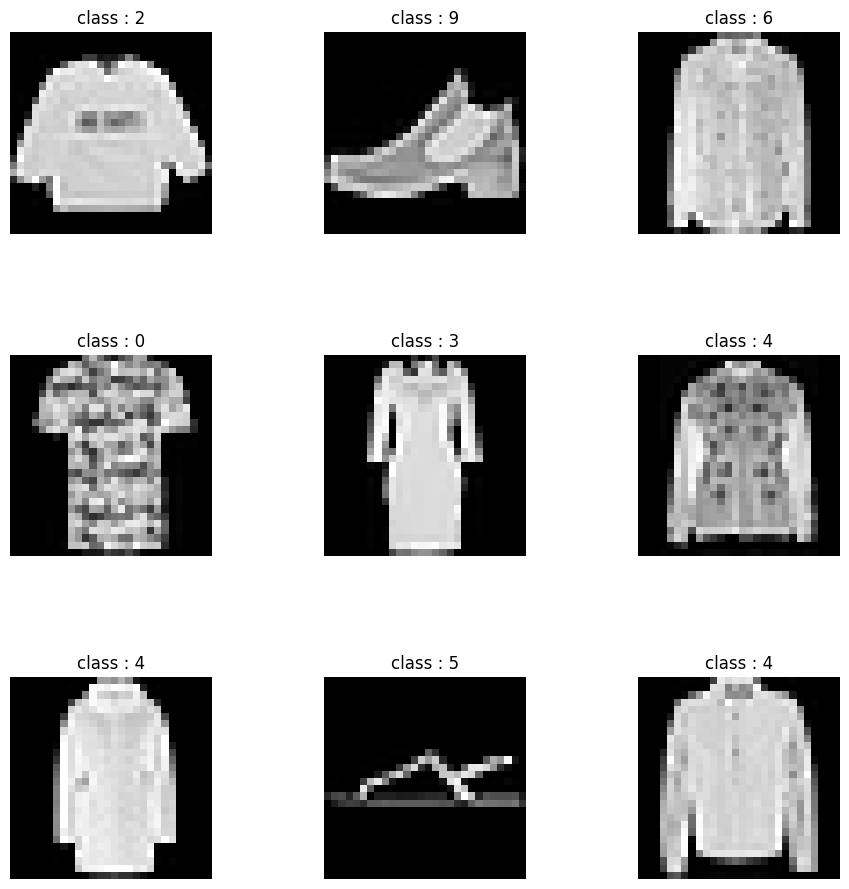

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(11,11))

for i in range(3):
    for j in range(3):
        ax[i][j].imshow(x[3*i+j],cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(f'class : {y[3*i+j]}')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

## Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

## One Hot Encoding

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## CNN Model Training

In [ ]:
model = Sequential([
    InputLayer(shape=(28,28,1)),

    Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256,keras.layers.ELU(alpha=1.5,),kernel_initializer='he_uniform'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(256,keras.layers.ELU(alpha=1.5,),kernel_initializer='he_uniform'),
    Dropout(0.25),
    BatchNormalization(),

    Dense(128,keras.layers.ELU(alpha=1.5,),kernel_initializer='he_uniform'),
    BatchNormalization(),


    Dense(10,'softmax'),
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=128)

Epoch 1/30
 36/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5995 - loss: 1.2173

I0000 00:00:1718200127.513837     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718200127.531387     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7798 - loss: 0.6291

W0000 00:00:1718200129.764358     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7819 - loss: 0.6227 - val_accuracy: 0.8810 - val_loss: 0.3336
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8811 - loss: 0.3258 - val_accuracy: 0.8932 - val_loss: 0.3025
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8991 - loss: 0.2752 - val_accuracy: 0.9042 - val_loss: 0.2658
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9103 - loss: 0.2483 - val_accuracy: 0.9100 - val_loss: 0.2519
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9208 - loss: 0.2204 - val_accuracy: 0.9093 - val_loss: 0.2549
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9291 - loss: 0.1936 - val_accuracy: 0.9158 - val_loss: 0.2412
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9322 - loss: 0.1868 - val_accuracy: 0.9155 - val_loss: 0.2490
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9408 - loss: 0.1605 - val_accuracy: 0.9162 - val

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
ax1.plot(history.history['loss'],label='training')
ax1.plot(history.history['val_loss'],label='validation')
ax1.set_title('loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')

plt.subplots_adjust(wspace=0.3)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()

NameError: name 'plt' is not defined

**after around 20 epoches the validation loss started increasing and the accuracy became stagnent.**

## Test Data

In [ ]:
test_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
test_input = test_data.drop('label',axis=1)
test_output = test_data['label']
test_input.shape

NameError: name 'pd' is not defined

In [ ]:
# preprocessing the images
test_input = np.array(test_input)
test_input = test_input.reshape(10000,28,28,1)
test_input = test_input/255.0

test_input.shape

(10000, 28, 28, 1)

In [ ]:
y_pred = model.predict(test_input)
final_pred = [np.argmax(val) for val in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
accuracy_score(test_output,final_pred)

0.924

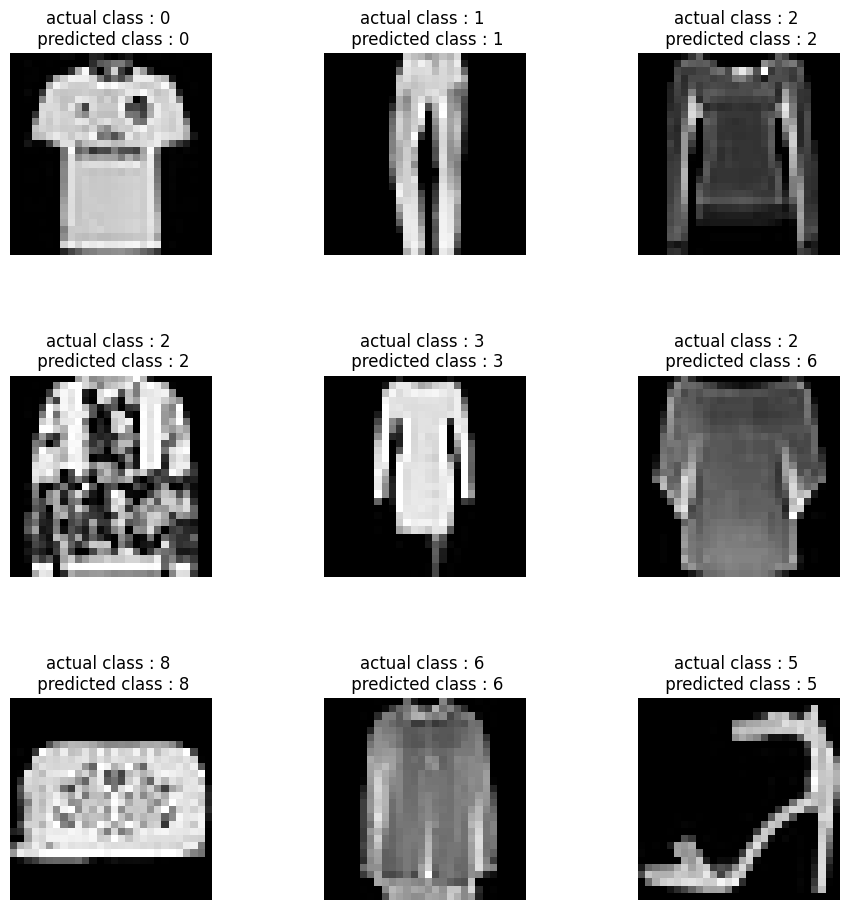

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(11,11))

for i in range(3):
    for j in range(3):
        ax[i][j].imshow(test_input[3*i+j],cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(f'actual class : {test_output[3*i+j]} \n predicted class : {final_pred[3*i+j]}')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

## Classification Report

In [ ]:
report = classification_report(test_output, final_pred)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.87      0.89      1000
           3       0.90      0.95      0.92      1000
           4       0.89      0.91      0.90      1000
           5       0.98      0.98      0.98      1000
           6       0.83      0.73      0.78      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



**Our model is performing worst in case of class 6**

## Confusion matrix

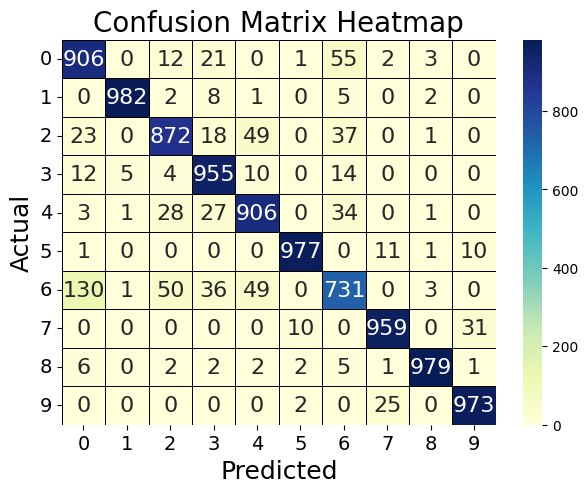

In [ ]:
cm = confusion_matrix(test_output, final_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            annot_kws={"size": 16}, linewidths=.5, linecolor='black')

# Add labels and title
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.show()

**Interesting to note here that we are making most mistakes in class 6 and model many times is predictiong it as class 0 image suggesting high similarity in features of both class**